In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#load data
a=pd.read_csv("imdb_movie_data.csv")
#to remove extra white spaces i.e."DateofTemination " beacomes"DateofTemination"
a.columns=a.columns.str.strip()

In [3]:
print(a)
print(a.head())
print(a.tail())

      MovieId                   Movie_Name  Rating     Votes  Meta_Score  \
0           0       Leave the World Behind     6.5   90000.0        67.0   
1           1                        Wonka     7.4   24000.0        66.0   
2           2                  Poor Things     8.5    6700.0        86.0   
3           3   Killers of the Flower Moon     7.8  128000.0        89.0   
4           4                 May December     7.0   21000.0        85.0   
...       ...                          ...     ...       ...         ...   
1945     1945            Definitely, Maybe     7.1  172000.0        59.0   
1946     1946                      The Fly     7.6  198000.0        79.0   
1947     1947             The Mighty Ducks     6.5   71000.0        46.0   
1948     1948                Little Giants     6.4   30000.0         NaN   
1949     1949                American Made     7.1  203000.0        65.0   

                          Genre PG_Rating  Year Duration  \
0      Drama, Mystery, Thri

In [4]:
# Duplicate rows check karna
duplicates = a[a.duplicated()]

print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [MovieId, Movie_Name, Rating, Votes, Meta_Score, Genre, PG_Rating, Year, Duration, Cast, Director]
Index: []


In [5]:
#to find total duplicated rows
print("Total duplicate rows:", a.duplicated().sum())

Total duplicate rows: 0


In [6]:
top_movies = a.sort_values(by="Rating", ascending=False).head(5)

print(top_movies[['Movie_Name', 'Rating', 'Votes']])

                     Movie_Name  Rating      Votes
80     The Shawshank Redemption     9.3  2800000.0
1766              Da 'Partments     9.3       82.0
88                The Godfather     9.2  2000000.0
219            Schindler's List     9.0  1400000.0
115             The Dark Knight     9.0  2800000.0


In [7]:
top_movies = a[a['Year']==2023].sort_values(by="Rating", ascending=False)

print(top_movies[['Movie_Name', 'Year','Rating']])

                                Movie_Name  Year  Rating
1766                         Da 'Partments  2023     9.3
291         Renaissance: A Film by Beyoncé  2023     8.7
59     Spider-Man: Across the Spider-Verse  2023     8.6
205                  Waitress: The Musical  2023     8.6
963                   Freud's Last Session  2023     8.5
...                                    ...   ...     ...
47                    The Boys in the Boat  2023     NaN
49                        The Color Purple  2023     NaN
76                     All of Us Strangers  2023     NaN
577                   The Book of Clarence  2023     NaN
1671                         Self Reliance  2023     NaN

[254 rows x 3 columns]


In [8]:
total_number_of_votes = a[a['Year']==2023]['Votes'].sum()
print("total_number_of_votes",total_number_of_votes)

total_number_of_votes 8960645.0


In [9]:
leo_movies = a[a['Cast'].str.contains("Leonardo DiCaprio", case=False, na=False)]
print(leo_movies[['Movie_Name', 'Year', 'Rating', 'Votes', 'Cast']].to_string())

                          Movie_Name  Year  Rating      Votes                                                                       Cast
3         Killers of the Flower Moon  2023     7.8   128000.0           Leonardo DiCaprio, Robert De Niro, Lily Gladstone, Jesse Plemons
89           The Wolf of Wall Street  2013     8.2  1500000.0          Leonardo DiCaprio, Jonah Hill, Margot Robbie, Matthew McConaughey
143    Once Upon a Time in Hollywood  2019     7.6   815000.0                  Leonardo DiCaprio, Brad Pitt, Margot Robbie, Emile Hirsch
146                        Inception  2010     8.8  2500000.0         Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Ken Watanabe
155                          Titanic  1997     7.9  1300000.0                   Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
217                 Django Unchained  2012     8.5  1700000.0           Jamie Foxx, Christoph Waltz, Leonardo DiCaprio, Kerry Washington
222                     The Departed  200

In [10]:
movies_2000_2023 = a[(a['Year'] >= 2000) & (a['Year'] <= 2023)]
print(movies_2000_2023[['Movie_Name', 'Year', 'Rating', 'Votes']])

                            Movie_Name  Year  Rating     Votes
0               Leave the World Behind  2023     6.5   90000.0
1                                Wonka  2023     7.4   24000.0
2                          Poor Things  2023     8.5    6700.0
3           Killers of the Flower Moon  2023     7.8  128000.0
4                         May December  2023     7.0   21000.0
...                                ...   ...     ...       ...
1942                   Drag Me to Hell  2009     6.6  215000.0
1943   Transformers: Age of Extinction  2014     5.6  328000.0
1944                           Annette  2021     6.3   22000.0
1945                 Definitely, Maybe  2008     7.1  172000.0
1949                     American Made  2017     7.1  203000.0

[1442 rows x 4 columns]


In [11]:
a['Genre']=a['Genre'].str.strip().str.lower()
bio_genre = a[a['Genre'].str.contains("biography", case=False, na=False)]
bio_genre = a[a['Genre'].str.contains("biography", na=False)]
print(len(bio_genre))

110


In [12]:
hightest_votes = a.sort_values(by="Votes", ascending=False).head(5)
print(hightest_votes[['Movie_Name', 'Votes']])

                    Movie_Name      Votes
115            The Dark Knight  2800000.0
80    The Shawshank Redemption  2800000.0
146                  Inception  2500000.0
130                 Fight Club  2300000.0
232               Forrest Gump  2200000.0


In [13]:
#OLDEST MOVIES IN DATAEST
oldest_movie = a.sort_values(by="Year", ascending=True).head(1)
print(oldest_movie[['Movie_Name','Year']])

              Movie_Name  Year
1046   A Christmas Carol  1938


In [14]:
count_of_movies = (
    a.groupby('Director')['Movie_Name']
     .count()
     .reset_index()
     .rename(columns={'Movie_Name': 'Movie_Count'})
     .sort_values(by="Movie_Count", ascending=False)
)

print(count_of_movies)
#if you want whole data print(count_of_movies.to_string())


                 Director  Movie_Count
868      Steven Spielberg           25
752          Ridley Scott           18
576       Martin Scorsese           15
775       Robert Zemeckis           12
896            Tim Burton           12
..                    ...          ...
397           Jenn Wexler            1
398   Jennifer Yuh Nelson            1
399            Jenny Gage            1
400   Jeremiah S. Chechik            1
481  Joseph Gordon-Levitt            1

[962 rows x 2 columns]


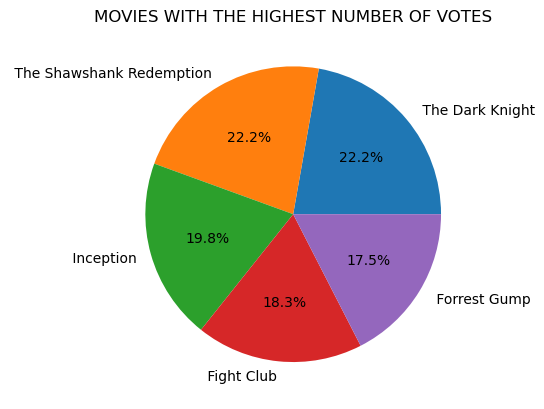

In [15]:
hightest_votes = a.sort_values(by="Votes", ascending=False).head(5)
plt.pie(hightest_votes['Votes'],labels=hightest_votes['Movie_Name'],autopct='%1.1f%%')  # values for the pielabels
plt.title("MOVIES WITH THE HIGHEST NUMBER OF VOTES")
plt.show()

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\2415681491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hightest_votes, x="Votes", y="Movie_Name", palette="pastel")


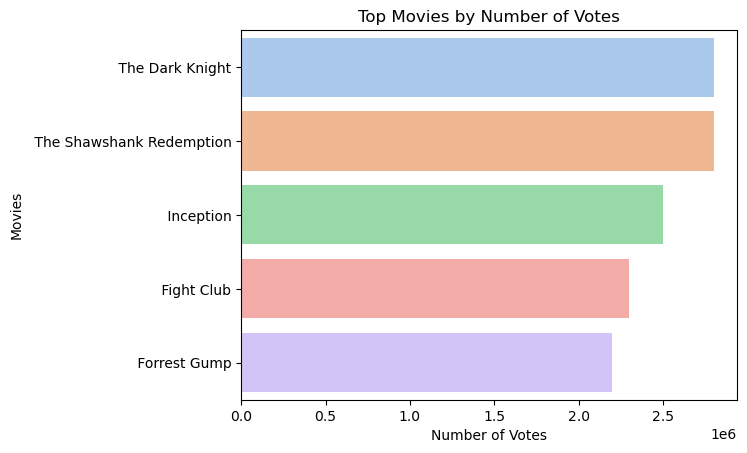

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Horizontal Bar Chart
sns.barplot(data=hightest_votes, x="Votes", y="Movie_Name", palette="pastel")
plt.xlabel("Number of Votes")
plt.ylabel("Movies")
plt.title("Top Movies by Number of Votes")
plt.show()


                          Genre  Movie_Count
0     action, adventure, sci-fi           92
1                        comedy           64
2        comedy, drama, romance           59
3                         drama           56
4  animation, adventure, comedy           52
5    action, adventure, fantasy           51
6     action, adventure, comedy           47


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\1302851699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gr_counts, x="Genre", y="Movie_Count", palette="colorblind")


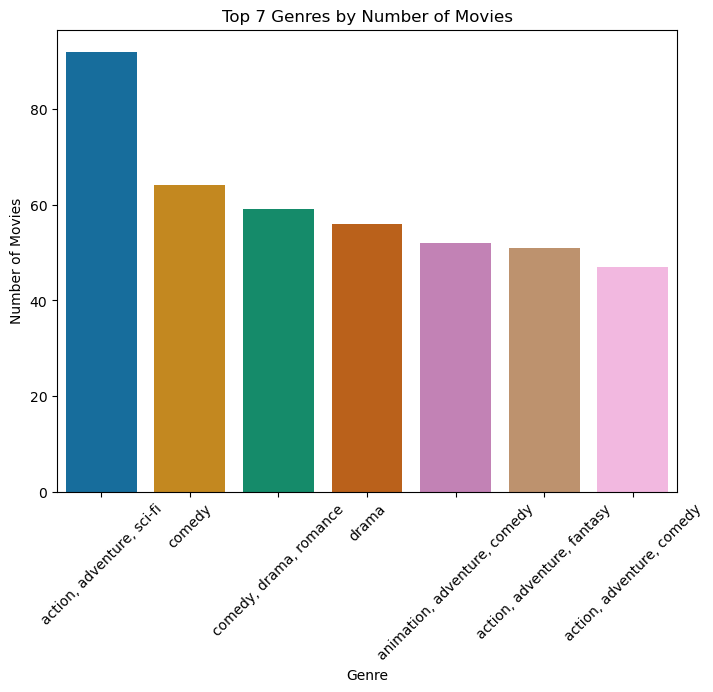

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

gr_counts = a['Genre'].value_counts().reset_index().head(7)
gr_counts.columns = ['Genre', 'Movie_Count']
print(gr_counts)

plt.figure(figsize=(8,6))
sns.barplot(data=gr_counts, x="Genre", y="Movie_Count", palette="colorblind")

plt.title("Top 7 Genres by Number of Movies")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.show()

  Duration  Movie_Count
0   1h 40m           57
1   1h 47m           50
2   1h 42m           47
3   1h 45m           45
4   1h 37m           43
5   1h 44m           43
6   1h 56m           41


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\3678490815.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pg_counts, x="Duration", y="Movie_Count", palette="bright")


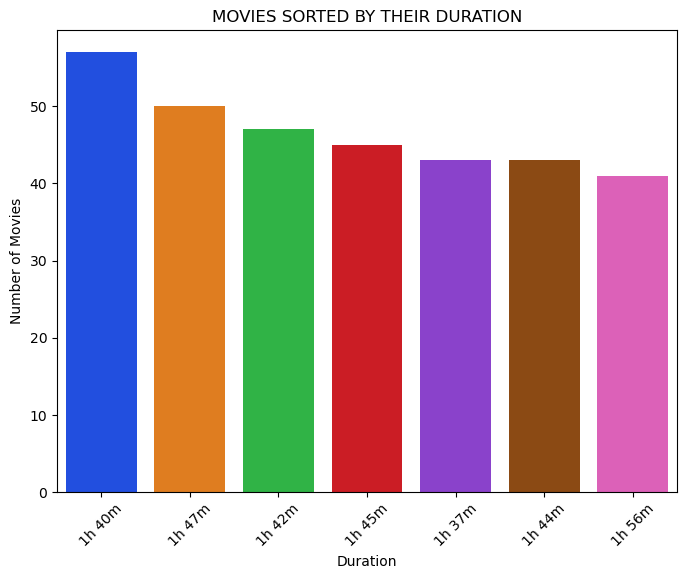

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

pg_counts = a['Duration'].value_counts().reset_index().head(7)
pg_counts.columns = ['Duration', 'Movie_Count']
print(pg_counts)

plt.figure(figsize=(8,6))
sns.barplot(data=pg_counts, x="Duration", y="Movie_Count", palette="bright")

plt.title("MOVIES SORTED BY THEIR DURATION")
plt.xticks(rotation=45)   # naam ko rotate kiya
plt.xlabel("Duration")
plt.ylabel("Number of Movies")
plt.show()

            Director  Movie_Count
0   Steven Spielberg           25
1       Ridley Scott           18
2    Martin Scorsese           15
3         Tim Burton           12
4    Robert Zemeckis           12
5  Christopher Nolan           11
6        Michael Bay           11
7         Ron Howard           11
8      Antoine Fuqua           10
9        Guy Ritchie           10


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\4094846121.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pg_counts, x="Director", y="Movie_Count", palette="mako")


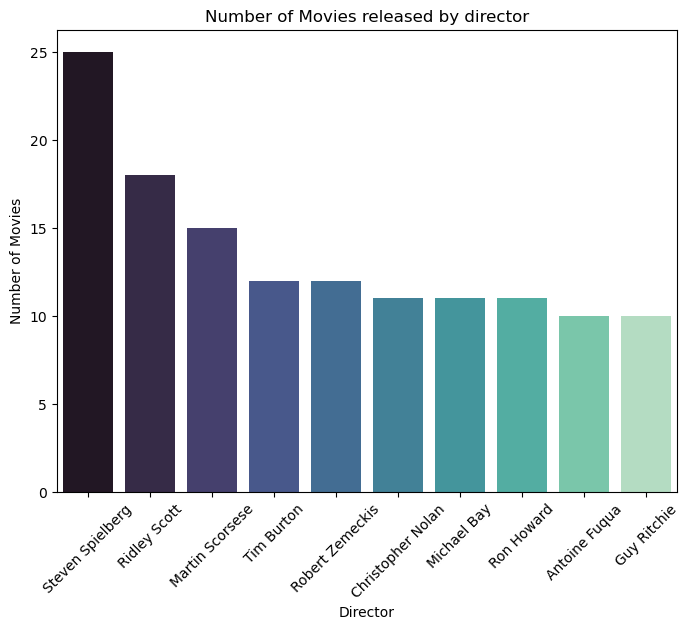

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

pg_counts = a['Director'].value_counts().reset_index().head(10)
pg_counts.columns = ['Director', 'Movie_Count']
print(pg_counts)

plt.figure(figsize=(8,6))
sns.barplot(data=pg_counts, x="Director", y="Movie_Count", palette="mako")

plt.title("Number of Movies released by director")
plt.xticks(rotation=45)   # naam ko rotate kiya
plt.xlabel("Director")
plt.ylabel("Number of Movies")
plt.show()

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\4240778847.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pg_counts, x="PG_Rating", y="Movie_Count", palette="mako")


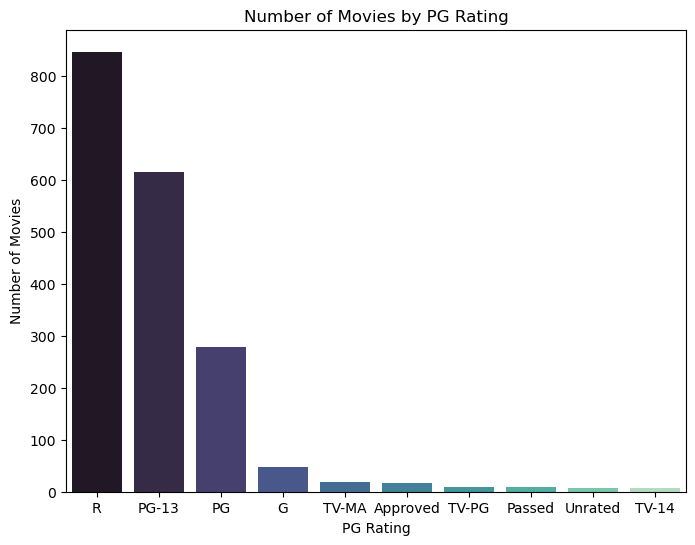

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

pg_counts = a['PG_Rating'].value_counts().reset_index().head(10)
pg_counts.columns = ['PG_Rating', 'Movie_Count']

plt.figure(figsize=(8,6))
sns.barplot(data=pg_counts, x="PG_Rating", y="Movie_Count", palette="mako")

plt.title("Number of Movies by PG Rating")
plt.xlabel("PG Rating")
plt.ylabel("Number of Movies")
plt.show()

In [55]:
import matplotlib.pyplot as plt

avg_meta_score = a[a['Year'] == 2023]['Meta_Score'].mean()
print("avg_meta_score : ",avg_meta_score)


avg_meta_score :  58.88324873096447


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\3382032944.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered, x="Movie_Name", y="Votes", palette="viridis")


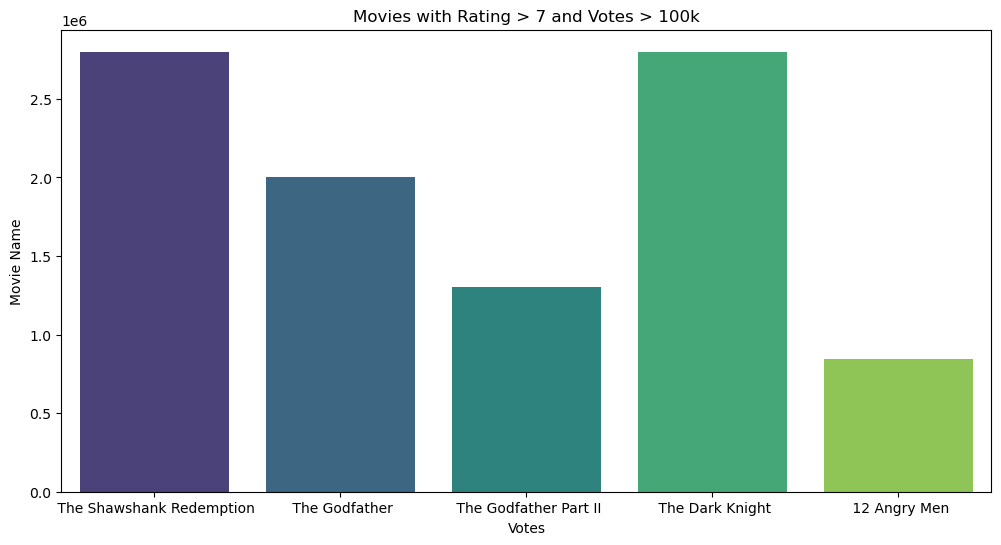

In [56]:
filtered = a[(a['Rating'] > 7) & (a['Votes'] > 100000)].sort_values(by="Rating", ascending=False).head(5)
# Horizontal bar chart (Rating wise)
plt.figure(figsize=(12,6))
sns.barplot(data=filtered, x="Movie_Name", y="Votes", palette="viridis")

plt.title("Movies with Rating > 7 and Votes > 100k")
plt.xlabel("Votes")
plt.ylabel("Movie Name")
plt.show()


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\763779111.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x="Rating", y="Movie_Name", palette="mako")


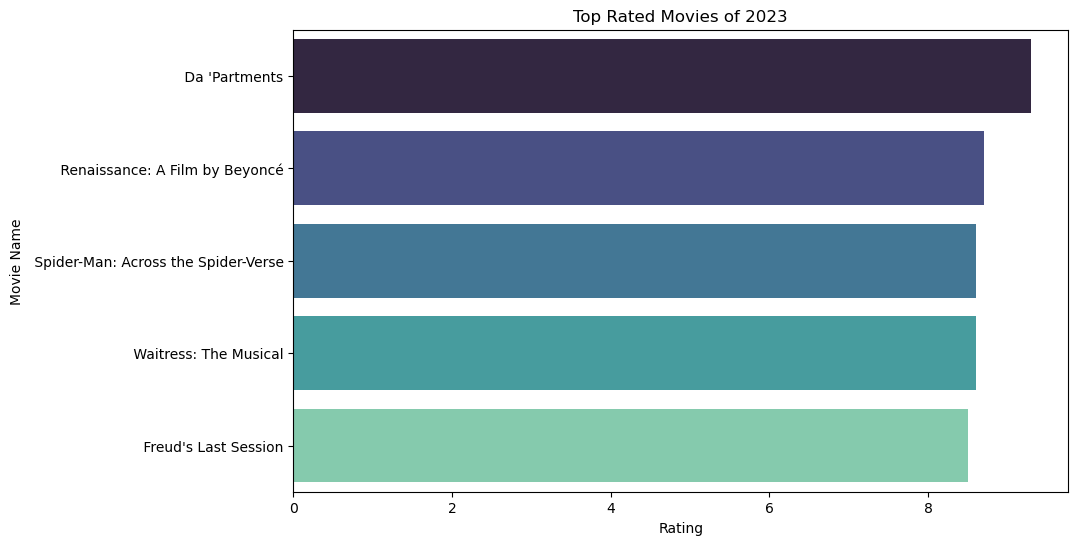

In [23]:
top_movies = a[a['Year']==2023].sort_values(by="Rating", ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data=top_movies, x="Rating", y="Movie_Name", palette="mako")

plt.title("Top Rated Movies of 2023")
plt.xlabel("Rating")
plt.ylabel("Movie Name")
plt.show()

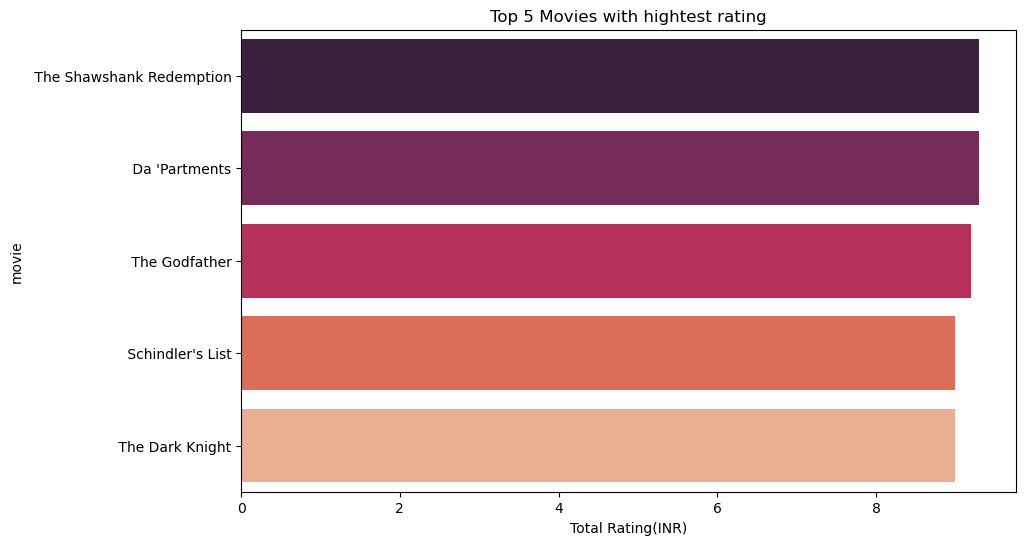

In [24]:
#Top 5 Movies with hightest rating
file_path='imdb_movie_data.xlsx'

top_movies = a.sort_values(by="Rating", ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(data=top_movies,x='Rating',y='Movie_Name',hue='Movie_Name',palette='rocket',legend=False)
plt.title('Top 5 Movies with hightest rating')
plt.xlabel('Total Rating(INR)')
plt.ylabel('movie')
plt.show()

In [25]:
import pandas as pd

# Example dataframe
# a = pd.DataFrame({'movie_name':['A','B','C','D'],
#                   'Duration':['2h 30m','150m','2h','1h 10m'],
#                   'rating':[7.5,8.2,6.9,7.1]})


a[['hours', 'minutes']] = a['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')

a[['hours', 'minutes']] = a[['hours', 'minutes']].fillna(0).astype(int)

a['duration_minutes'] = a['hours'] * 60 + a['minutes']

result = a[a['duration_minutes'] > 120][['Movie_Name', 'Duration', 'Rating', 'duration_minutes']]

# Sort descending by duration_minutes
result = result.sort_values(by="duration_minutes", ascending=False)

print(result)


                         Movie_Name Duration  Rating  duration_minutes
1937                  Occupied City    4h 6m     7.1               246
601    Zack Snyder's Justice League    4h 2m     7.9               242
801              Gone with the Wind   3h 58m     8.2               238
523     Once Upon a Time in America   3h 49m     8.3               229
1847           The Ten Commandments   3h 40m     7.9               220
...                             ...      ...     ...               ...
960                         Everest    2h 1m     7.1               121
456                         Network    2h 1m     8.1               121
797                        Hot Fuzz    2h 1m     7.8               121
1834                     Hellraiser    2h 1m     5.9               121
1547                     Underworld    2h 1m     7.0               121

[688 rows x 4 columns]


In [58]:
# Trim and uppercase (SQL TRIM/UPPER ke jaisa)
a['PG_Rating_clean'] = a['PG_Rating'].str.strip().str.upper()

# Exact match only
total_count = (a['PG_Rating_clean'] == 'R').sum()
print("TOTAL NUMBER OF R-RATED MOVIES : ",total_count)


TOTAL NUMBER OF R-RATED MOVIES :  846


In [59]:
maltiple_Directore=a[a['Director'].str.contains(",",case=False,na=False)]
maltiple_Directore = a[a['Director'].str.contains(",", na=False)]
print("MOVIES THAT HAVE MULTIPLE DIRECTORS LISTED : ",len(maltiple_Directore))

MOVIES THAT HAVE MULTIPLE DIRECTORS LISTED :  0


In [28]:
# Clean ratings
a['PG_Rating_clean'] = a['PG_Rating'].str.strip().str.upper()

# Filter rows where PG_Rating is PG or PG13
filtered = a[a['PG_Rating_clean'].isin(['PG', 'PG13'])]

# Show Movie_Name and PG_Rating
print(filtered[['Movie_Name', 'PG_Rating']])


                           Movie_Name PG_Rating
1                               Wonka        PG
9                     Candy Cane Lane        PG
16                      Family Switch        PG
18                                Elf        PG
19     How the Grinch Stole Christmas        PG
...                               ...       ...
1930           Appointment with Death        PG
1933                 We Can Be Heroes        PG
1936           The Remains of the Day        PG
1947                 The Mighty Ducks        PG
1948                    Little Giants        PG

[278 rows x 2 columns]


C:\Users\Samiksha\AppData\Local\Temp\ipykernel_15824\2526785302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_of_movies,x=count_of_movies['Year'],y=count_of_movies['Movie_Count'],palette="muted")


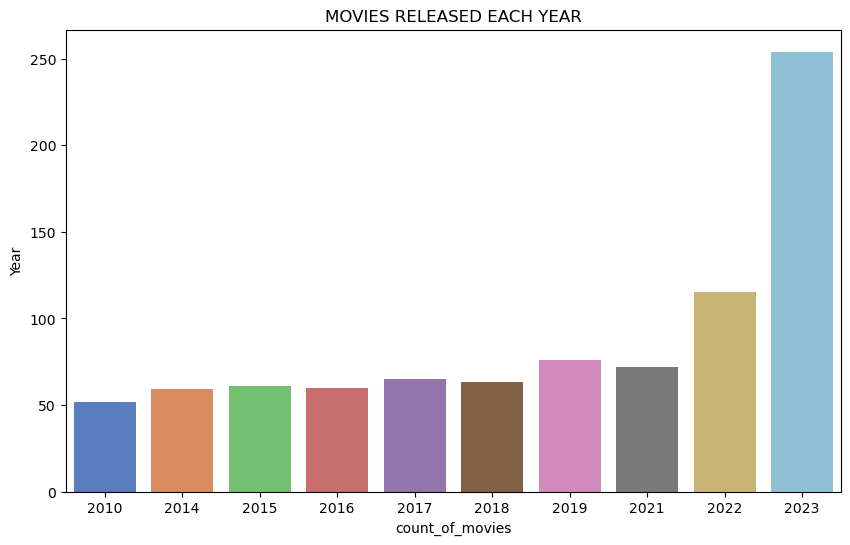

    Year  Movie_Count
82  2023          254
81  2022          115
78  2019           76
80  2021           72
76  2017           65
77  2018           63
74  2015           61
75  2016           60
73  2014           59
69  2010           52


In [70]:
count_of_movies = (
    a.groupby('Year')['Movie_Name']
     .count()
     .reset_index()
     .rename(columns={'Movie_Name': 'Movie_Count'})
     .sort_values(by="Movie_Count", ascending=False).head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(data=count_of_movies,x=count_of_movies['Year'],y=count_of_movies['Movie_Count'],palette="muted")
plt.title("MOVIES RELEASED EACH YEAR")
plt.xlabel("count_of_movies")
plt.ylabel("Year")
plt.show()
print(count_of_movies)

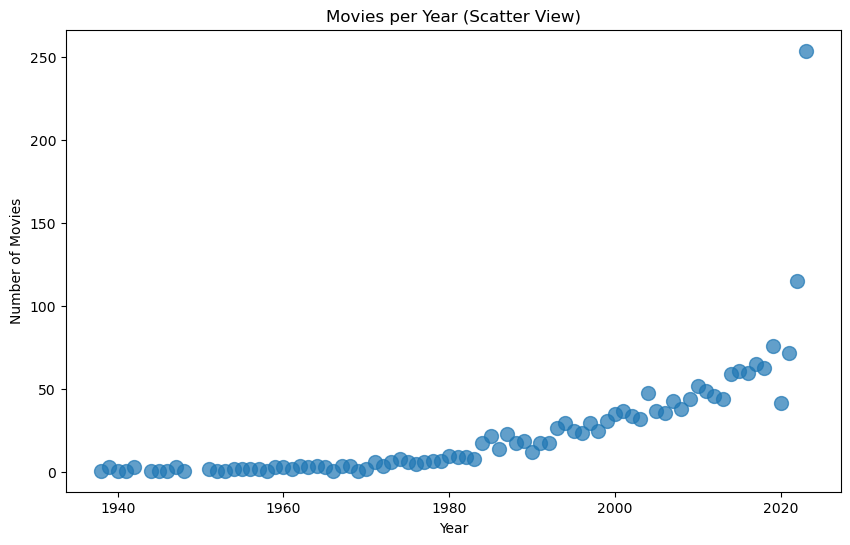

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(count_of_movies['Year'], count_of_movies['Movie_Count'], s=100, alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Movies per Year (Scatter View)")
plt.show()

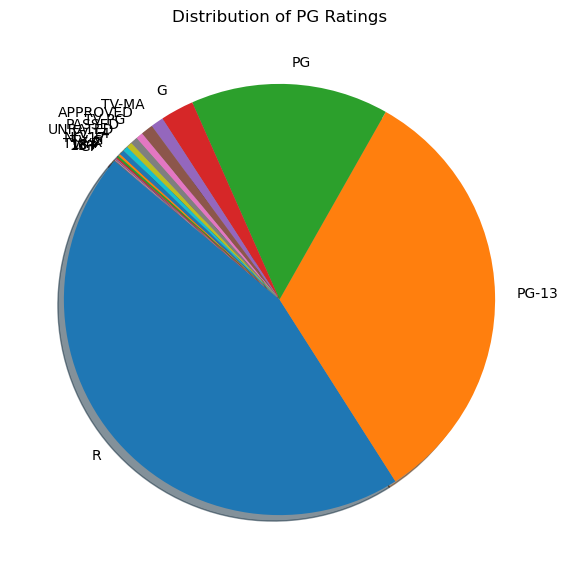

In [31]:
import matplotlib.pyplot as plt

# Count PG ratings
rating_counts = a['PG_Rating_clean'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    startangle=140,
    shadow=True
)
plt.title("Distribution of PG Ratings")
plt.show()


In [32]:
# Clean Genre safely
a['Genre_clean'] = a['Genre'].fillna('').str.strip().str.lower()

# Filter rows where Genre is 'action' or 'adventure'
filtered = a[a['Genre_clean'].str.contains('action|adventure', na=False)]

# Show Movie_Name and Genre
print(filtered)
print(filtered[['Movie_Name', 'Genre']])


      MovieId                                         Movie_Name  Rating  \
1           1                                              Wonka     7.4   
5           5   The Hunger Games: The Ballad of Songbirds & S...     7.1   
6           6                                           Napoleon     6.6   
11         11                                             Barbie     7.0   
13         13             Rebel Moon - Part One: A Child of Fire     6.3   
...       ...                                                ...     ...   
1938     1938                           The Man in the Iron Mask     6.5   
1939     1939                                   We Were Soldiers     7.2   
1941     1941                            Dragged Across Concrete     6.9   
1943     1943                    Transformers: Age of Extinction     5.6   
1949     1949                                      American Made     7.1   

         Votes  Meta_Score                         Genre PG_Rating  Year  \
1      2400

In [33]:
# Clean genre text
a['Genre_clean'] = a['Genre'].fillna('').str.lower()

# Filter rows where genre contains both 'action' and 'adventure'
filtered = a[a['Genre_clean'].str.contains('action') & a['Genre_clean'].str.contains('adventure')]

# Total movies count
total_movies = filtered.shape[0]
print("Total movies with Action & Adventure genre:", total_movies)


Total movies with Action & Adventure genre: 322


In [34]:
movie_released = a[a['Year'] < 2000]
movie_released = movie_released.sort_values(by="Year", ascending=True)

print(movie_released[['Movie_Name', 'Year']].to_string())


                                                                 Movie_Name  Year
1046                                                      A Christmas Carol  1938
801                                                      Gone with the Wind  1939
881                                                      Remember the Night  1939
162                                                        The Wizard of Oz  1939
851                                              The Shop Around the Corner  1940
1331                                                           Citizen Kane  1941
685                                                              Casablanca  1942
1899                                               The Pride of the Yankees  1942
330                                                             Holiday Inn  1942
424                                                    Meet Me in St. Louis  1944
360                                                Christmas in Connecticut  1945
37              

In [35]:
movie = a.sort_values(by="Duration", ascending=True).head(1)

print(movie[['Movie_Name', 'Duration']])

              Movie_Name Duration
1827   Picture of Beauty   1h 10m


In [36]:
movie = a.sort_values(by="Duration", ascending=False).head(1)

print(movie[['Movie_Name', 'Duration']])

          Movie_Name Duration
1937   Occupied City    4h 6m


In [37]:
avg_rating = a['Rating'].mean()

print("Average Movie Rating:", avg_rating)

Average Movie Rating: 6.872788065843622
